In [84]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import make_pipeline

In [40]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15, 15)

In [105]:
X_train = pd.read_csv("data/AMF_train_X.csv")
y_train = pd.read_csv("data/AMF_train_Y.csv")
Xy_train = X_train.merge(y_train, how="inner", on=["Trader"])

In [106]:
Xy_train.head()

,Index,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,...,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade,type
0,1,Isin_8,Date_24,Trader_10,2.272727,8.333333,12.500000,0.0,5117.830300,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NON HFT
1,2,Isin_87,Date_29,Trader_10,1.696629,25.166667,21.571429,0.0,1846.968401,0.000074,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,NON HFT
2,3,Isin_87,Date_23,Trader_10,1.482759,47.300000,118.250000,0.0,686.300630,0.000071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,NON HFT
3,4,Isin_12,Date_11,Trader_10,1.705882,14.500000,29.000000,0.0,2174.335265,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NON HFT
4,5,Isin_87,Date_9,Trader_10,1.517730,26.750000,NaN,0.0,944.008551,0.000071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,NON HFT


In [6]:
X_train.shape

(105782, 39)

In [7]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105782 entries, 0 to 105781
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Index                       105782 non-null  int64  
 1   Share                       105782 non-null  object 
 2   Day                         105782 non-null  object 
 3   Trader                      105782 non-null  object 
 4   OTR                         104099 non-null  float64
 5   OCR                         105782 non-null  float64
 6   OMR                         58170 non-null   float64
 7   min_time_two_events         105782 non-null  float64
 8   mean_time_two_events        105782 non-null  float64
 9   10_p_time_two_events        105782 non-null  float64
 10  med_time_two_events         105782 non-null  float64
 11  25_p_time_two_events        105782 non-null  float64
 12  75_p_time_two_events        105782 non-null  float64
 13  90_p_time_two_

In [10]:
correspondances = {
    1: "NbTradeVenueMic",
    2: "MeanNbTradesBySecond",
    3: "MaxNbTradesBySecond",
    4: "min_dt_TV1",
    5: "mean_dt_TV1",
    6: "med_dt_TV1",
    7: "min_dt_TV1_TV2",
    8: "mean_dt_TV1_TV2",
    9: "med_dt_TV1_TV2",
    10: "min_dt_TV1_TV3",
    11: "mean_dt_TV1_TV3",
    12: "med_dt_TV1_TV3",
    13: "min_dt_TV1_TV4",
    14: "mean_dt_TV1_TV4",
    15: "med_dt_TV1_TV4",
    16: "NbSecondWithAtLeatOneTrade",
    17: "OTR",
    18: "OCR", 
    19: "OMR",
    20: "min_time_two_events",
    21: "mean_time_two_events",
    22: "10_p_time_two_events",
    23: "25_p_time_two_events",
    24: "med_time_two_events",
    25: "75_p_time_two_events",
    26: "90_p_time_two_events",
    27: "max_time_two_events",
    28: "min_lifetime_cancel",
    29: "mean_lifetime_cancel",
    30: "10_p_lifetime_cancel",
    31: "25_p_lifetime_cancel",
    32: "med_lifetime_cancel",
    33: "75_p_lifetime_cancel",
    34: "90_p_lifetime_cancel",
    35: "max_lifetime_cancel"
}

In [18]:
Xy_train.isna().sum()

Index                             0
Share                             0
Day                               0
Trader                            0
OTR                            1683
OCR                               0
OMR                           47612
min_time_two_events               0
mean_time_two_events              0
10_p_time_two_events              0
med_time_two_events               0
25_p_time_two_events              0
75_p_time_two_events              0
90_p_time_two_events              0
max_time_two_events               0
min_lifetime_cancel               0
mean_lifetime_cancel              0
10_p_lifetime_cancel              0
med_lifetime_cancel               0
25_p_lifetime_cancel              0
75_p_lifetime_cancel              0
90_p_lifetime_cancel              0
max_lifetime_cancel               0
NbTradeVenueMic                   0
MaxNbTradesBySecond               0
MeanNbTradesBySecond              0
min_dt_TV1                     4235
mean_dt_TV1                 

In [19]:
X_test = pd.read_csv("data/AMF_test_X.csv")

In [20]:
random_submission = pd.read_csv("data/random_file.csv") 

In [21]:
random_submission.head()

,Trader,type
0,Adelaide,NON HFT
1,Alana,NON HFT
2,Alcmene,MIX
3,Alice,MIX
4,Alices Sister,NON HFT


In [25]:
y_train.groupby(["type"]).count()

,Trader
type,
HFT,15
MIX,24
NON HFT,47


In [47]:
corr = Xy_train.corr()

<AxesSubplot:>

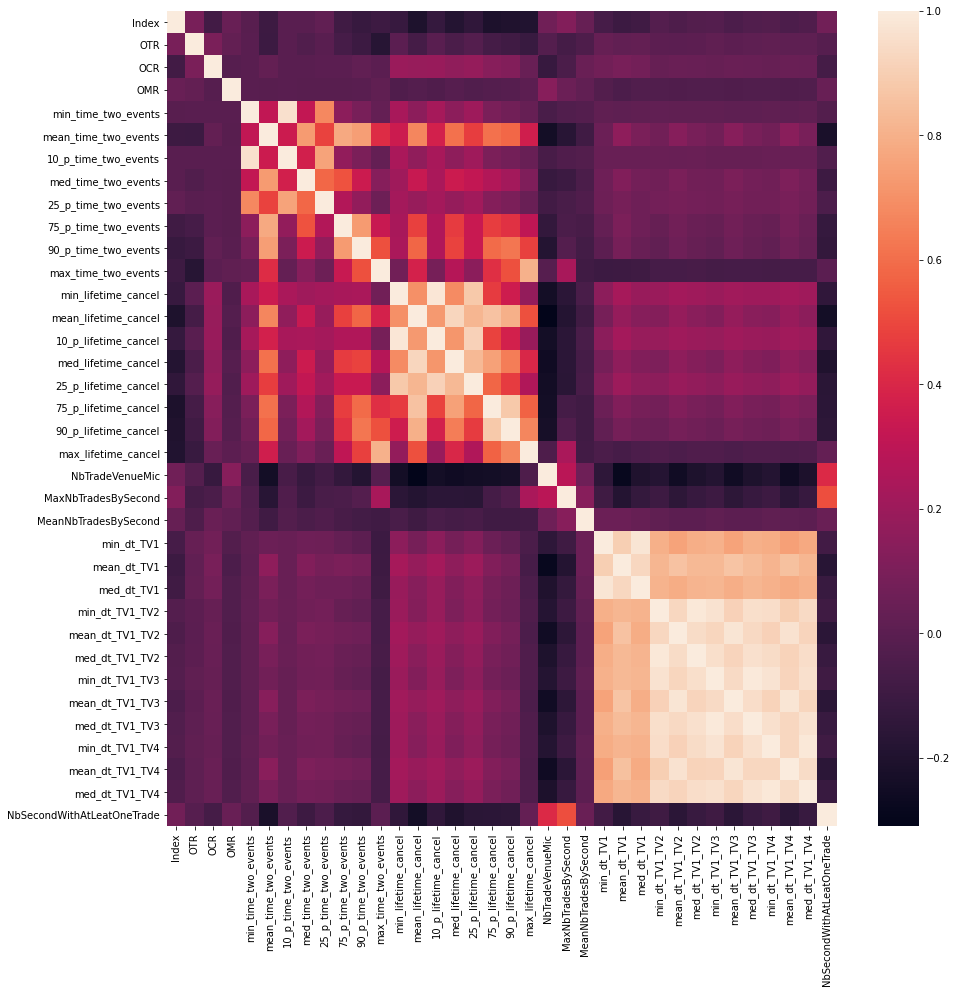

In [48]:
sns.heatmap(corr)

In [58]:
def corr_above_threshold(corr, threshold=0.9):
    corr_threshold = corr.mask((corr < threshold) | (corr == 1.0), 0)
    mask = np.triu(np.ones_like(corr_threshold, dtype=bool))
    sns.heatmap(corr_threshold, mask=mask)

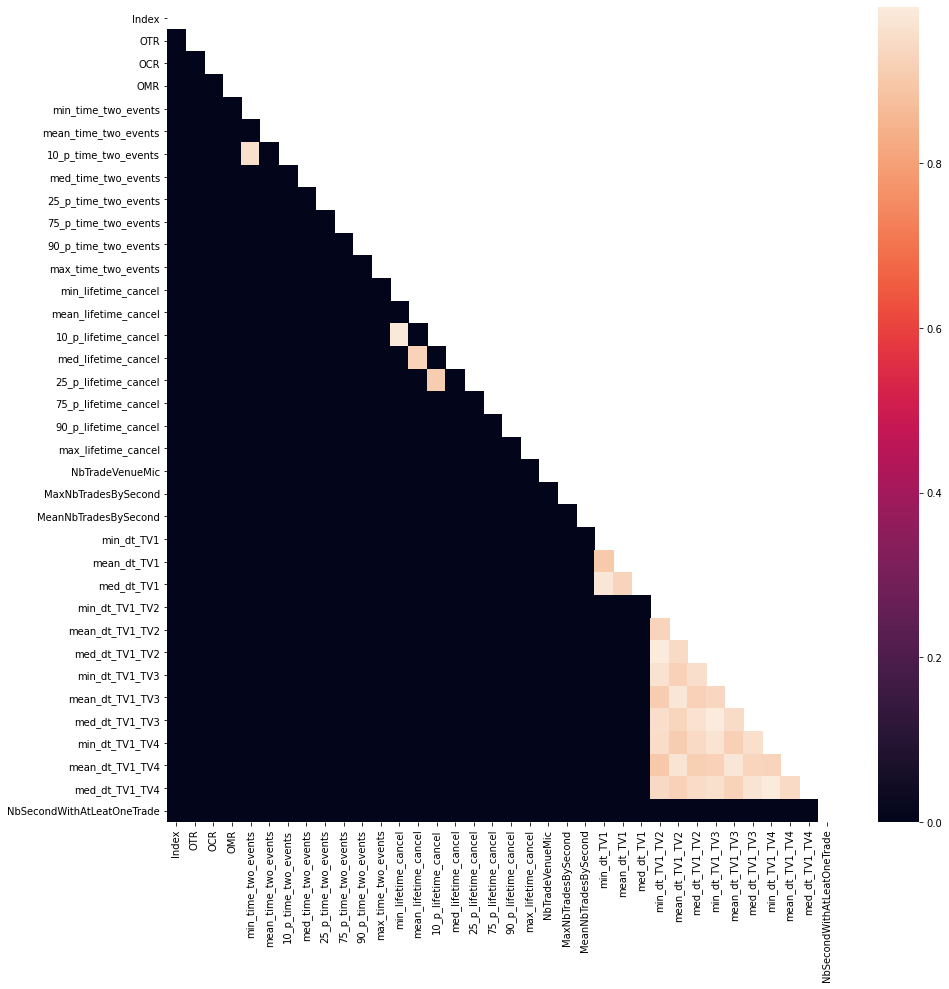

In [66]:
corr_above_threshold(corr, threshold=0.9)

In [67]:
X_train.describe()

,Index,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,med_time_two_events,25_p_time_two_events,75_p_time_two_events,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
count,105782.000000,104099.000000,105782.000000,58170.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,105782.000000,...,80606.000000,80606.000000,80606.000000,80527.000000,80527.000000,80527.000000,80634.000000,80634.000000,80634.000000,105782.000000
mean,52891.500000,34.435038,17.458787,164.469153,87.472164,2772.513578,103.310102,1011.630575,228.659560,4734.942457,...,297.616104,598.637740,389.411017,310.498829,605.733603,401.594794,309.912605,615.154194,402.749527,334.034070
std,30536.777425,137.261154,71.843225,929.010848,1549.972501,4985.149536,1617.051421,4967.426924,2319.866837,10431.964706,...,1882.353978,2010.296401,1896.835552,1922.648030,2031.797111,1933.073024,1910.028651,2037.041672,1923.023720,644.816702
min,1.000000,1.044444,2.000000,1.001960,0.000000,0.000065,0.000000,0.000000,0.000000,0.000000,...,0.000001,0.000002,0.000001,0.000001,0.000003,0.000002,0.000001,0.000008,0.000003,1.000000
25%,26446.250000,3.709023,2.753802,3.253655,0.000000,69.365666,0.000000,1.243868,0.000024,22.249021,...,0.000005,33.819189,2.533583,0.000006,32.699571,2.305276,0.000020,33.713187,2.639113,24.000000
50%,52891.500000,7.346154,4.789474,14.000000,0.000000,262.325253,0.000109,10.154920,0.093957,114.957445,...,0.000232,110.427370,22.413161,0.000260,111.633327,23.665962,0.000270,113.158721,23.435835,97.000000
75%,79336.750000,22.707956,16.366667,73.689116,0.000000,3801.273320,0.020739,60.552090,2.836749,2277.450350,...,0.008000,367.974973,121.244211,0.051880,376.874393,127.408500,0.059669,380.865913,128.108940,342.000000
max,105782.000000,17561.000000,14409.000000,127861.000000,52568.766000,52568.765625,52568.766000,52568.766000,52568.766000,60597.414000,...,30904.835000,30904.835000,30904.835000,30904.835000,30904.835000,30904.835000,30904.835000,30904.835000,30904.835000,12966.000000


In [73]:
OTR_ratio = 1 / 2.272727
OCR_ratio = 1 / 8.333333
OMR_ratio = 1 / 12.500000
total = OTR_ratio + OCR_ratio + OMR_ratio
OTR_ratio /= total
OCR_ratio /= total
OMR_ratio /= total
print(OTR_ratio)
print(OCR_ratio)
print(OMR_ratio)
print(OTR_ratio + OCR_ratio + OMR_ratio)

0.687500020625001
0.18749999062499925
0.12499998874999976
1.0


In [129]:
def normalize_events(X):
    
    X_transformed = X.copy()
    mask_OTR = X_transformed['OTR'].isna()
    mask_OCR = X_transformed['OCR'].isna()
    mask_OMR = X_transformed['OMR'].isna()
    X_transformed.loc[mask_OTR, 'OTR'] = 0
    X_transformed.loc[mask_OCR, 'OCR'] = 0
    X_transformed.loc[mask_OMR, 'OMR'] = 0
    X_transformed.loc[~mask_OTR, 'OTR'] = 1 / X_transformed['OTR']
    X_transformed.loc[~mask_OCR, 'OCR'] = 1 / X_transformed['OCR']
    X_transformed.loc[~mask_OMR, 'OMR'] = 1 / X_transformed['OMR']
    X_transformed['total'] = X_transformed['OTR'] + X_transformed['OCR'] + X_transformed['OMR']
    X_transformed['OTR'] /=  X_transformed['total']
    X_transformed['OCR'] /=  X_transformed['total']
    X_transformed['OMR'] /=  X_transformed['total']
    X_transformed.drop(['total'], inplace=True, axis=1)
    return X_transformed

In [130]:
normalizer = FunctionTransformer(normalize_events)

In [131]:
pipe = make_pipeline(normalizer)
pipe.fit_transform(X_train, y_train)

,Index,Share,Day,Trader,OTR,OCR,OMR,min_time_two_events,mean_time_two_events,10_p_time_two_events,...,min_dt_TV1_TV2,mean_dt_TV1_TV2,med_dt_TV1_TV2,min_dt_TV1_TV3,mean_dt_TV1_TV3,med_dt_TV1_TV3,min_dt_TV1_TV4,mean_dt_TV1_TV4,med_dt_TV1_TV4,NbSecondWithAtLeatOneTrade
0,1,Isin_8,Date_24,Trader_10,0.687500,0.187500,0.125000,0.0,5117.830300,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1,2,Isin_87,Date_29,Trader_10,0.872549,0.058824,0.068627,0.0,1846.968401,0.000074,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15
2,3,Isin_87,Date_23,Trader_10,0.957958,0.030030,0.012012,0.0,686.300630,0.000071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63
3,4,Isin_12,Date_11,Trader_10,0.850000,0.100000,0.050000,0.0,2174.335265,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,5,Isin_87,Date_9,Trader_10,0.946309,0.053691,0.000000,0.0,944.008551,0.000071,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105777,105778,Isin_84,Date_27,Trader_60,0.952381,0.047619,0.000000,0.0,736.500080,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
105778,105779,Isin_102,Date_18,Trader_60,0.944444,0.055556,0.000000,0.0,63.672695,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
105779,105780,Isin_12,Date_13,Trader_60,0.986842,0.013158,0.000000,0.0,708.440816,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16
105780,105781,Isin_27,Date_30,Trader_60,0.994253,0.005747,0.000000,0.0,384.893976,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35
